<a href="https://colab.research.google.com/github/nnbphuong/datascience4biz/blob/master/Exploration_using_Visualization_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORATION USING VISUALIZATION PLOTS**

> Phuong Nguyen  @ <a href="https://DataScience.vn" target="_blank">DataScience.vn</a>
> 
> Datasets:
>
> 1.   BostonHousing (census tracts in Boston): https://gist.github.com/nnbphuong/def91b5553736764e8e08f6255390f37 >> Description of variables: https://prnt.sc/scbecy
>
> 2.   Amtrak (the series of monthly ridership
between January 1991 and March 2004 @ Amtrak, a US railway company): https://gist.github.com/nnbphuong/6ede94587227bb57e8e1054fdb3ea98c
>
> 3.   Motor (motor vehicle collisions): https://gist.github.com/nnbphuong/2e80fa6f86a3a26ac14c9bb3dd34d5b8
>
> 4.   Utilities (public utilities in the United States): https://gist.github.com/nnbphuong/8f7868db8b13c33d4bb5a2a18fdc2a00 >> Description of variables: http://prntscr.com/scbljq
---



#Importing Required Packages

Pandas provides a number of basic plotting capabilities. Matplotlib however gives you more control over details of the visualisation.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates

import numpy as np
import calendar
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Datasets

In [0]:
housing_df = pd.read_csv("https://gist.githubusercontent.com/nnbphuong/def91b5553736764e8e08f6255390f37/raw/373a856a3c9c1119e34b344de9230ae2ea89569d/BostonHousing.csv")
amtrak_df = pd.read_csv("https://gist.githubusercontent.com/nnbphuong/6ede94587227bb57e8e1054fdb3ea98c/raw/5d989dc5605346226d402ce3cd49c74f792ebe0c/Amtrak.csv")
motor_df = pd.read_csv("https://gist.githubusercontent.com/nnbphuong/2e80fa6f86a3a26ac14c9bb3dd34d5b8/raw/8ca1068837704b5d17efcc2c2a3091bec8b7e9ad/Motor.csv").sort_values(['DATE'])
utilities_df = pd.read_csv("https://gist.githubusercontent.com/nnbphuong/8f7868db8b13c33d4bb5a2a18fdc2a00/raw/3df7e6189f0b25cbeec12f78edeecd09ba6c178f/Utilities.csv")


# Basic Plots

## Line Graph

In [0]:
amtrak_df.head()

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


In [0]:
amtrak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      159 non-null    object 
 1   Ridership  159 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [0]:
amtrak_df['Date'] = pd.to_datetime(amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(amtrak_df.Ridership.values, index=amtrak_df.Date)
amtrak_df.info()
amtrak_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    object        
 1   Ridership  159 non-null    float64       
 2   Date       159 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.9+ KB


,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01


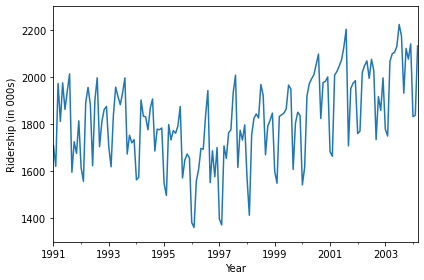

In [0]:
# use pandas
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Ridership (in 000s)')

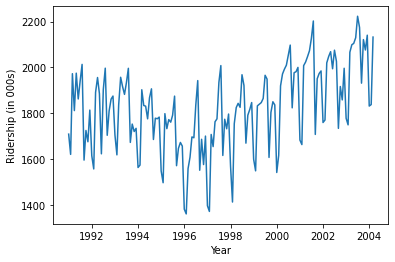

In [0]:
# use matplotlib
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

## Scatter Plot

In [0]:
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


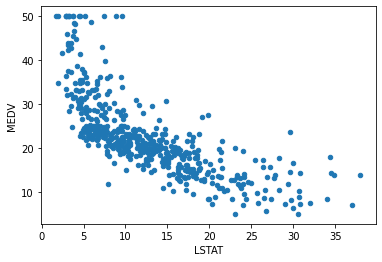

In [0]:
# use pandas
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

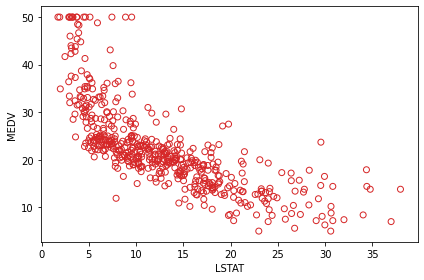

In [0]:
# use matplotlib
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
ax.scatter(housing_df.LSTAT, housing_df.MEDV, color='C3', facecolor='none')
plt.xlabel('LSTAT');plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

# fig.savefig('myplot.png')

## Bar Chart

In [0]:
dataForPlot = housing_df.groupby('CHAS').MEDV.mean()
dataForPlot

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

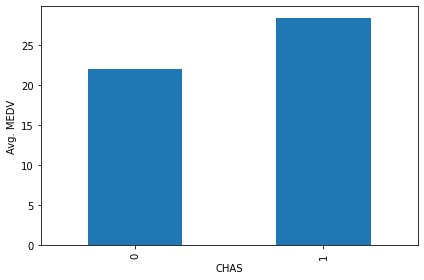

In [0]:
# use pandas
ax = dataForPlot.plot(kind='bar')
ax.set_ylabel('Avg. MEDV')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Avg. MEDV')

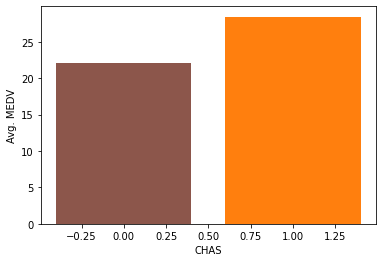

In [0]:
# use matplotlib
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xlabel('CHAS');ax.set_ylabel('Avg. MEDV')

In [0]:
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
dataForPlot

CHAS
0    15.498938
1    31.428571
Name: CAT_MEDV, dtype: float64

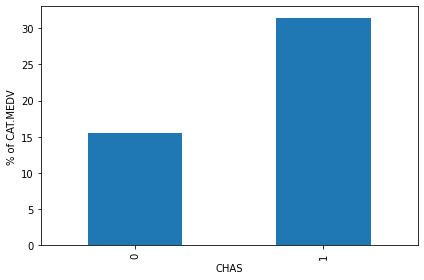

In [0]:
# use pandas
ax = dataForPlot.plot(kind='bar')
ax.set_ylabel('% of CAT.MEDV')

plt.tight_layout()
plt.show()

Text(0, 0.5, '% of CAT.MEDV')

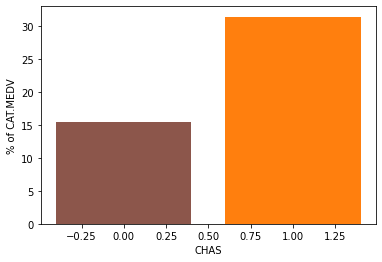

In [0]:
# use matplotlib
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xlabel('CHAS');ax.set_ylabel('% of CAT.MEDV')

# Distribution Plots

## Boxplot

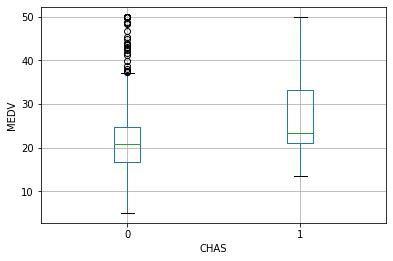

In [0]:
# use pands
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

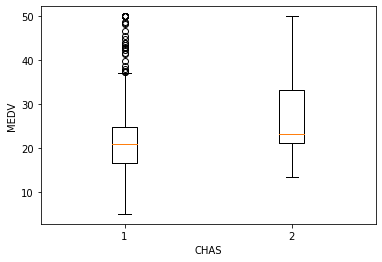

In [0]:
# use matplotlib
dataForPlot = [list(housing_df[housing_df.CHAS==0].MEDV), list(housing_df[housing_df.CHAS==1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xlabel('CHAS');ax.set_ylabel('MEDV')

plt.show()

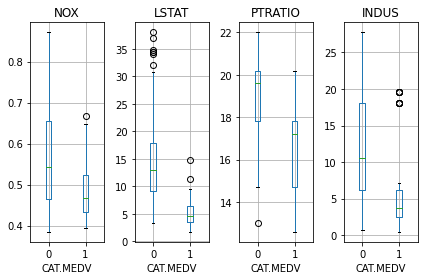

In [0]:
# Side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

## Histogram

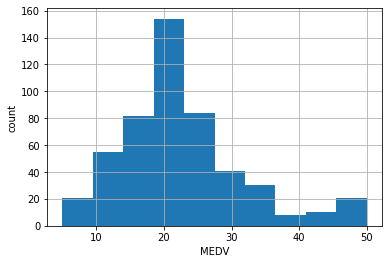

In [0]:
# use pandas
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

plt.show()

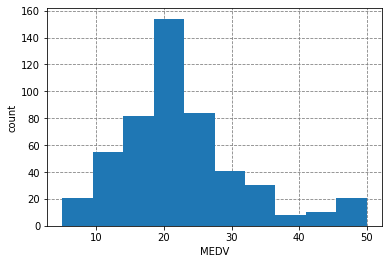

In [0]:
# use matplotlib
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('MEDV');ax.set_ylabel('count')
plt.show()

# Heatmap

## Heatmap of a Correlation Table

In [0]:
corr = housing_df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.273687


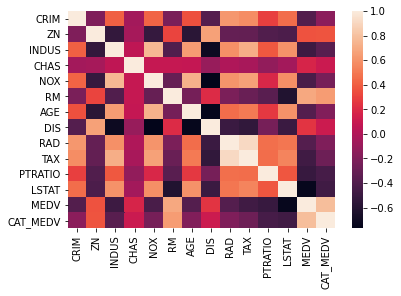

In [0]:
# use seaborn
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

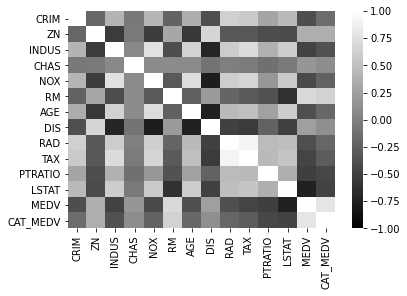

In [0]:
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="gray") #cmap: RdBu, BrBG,...

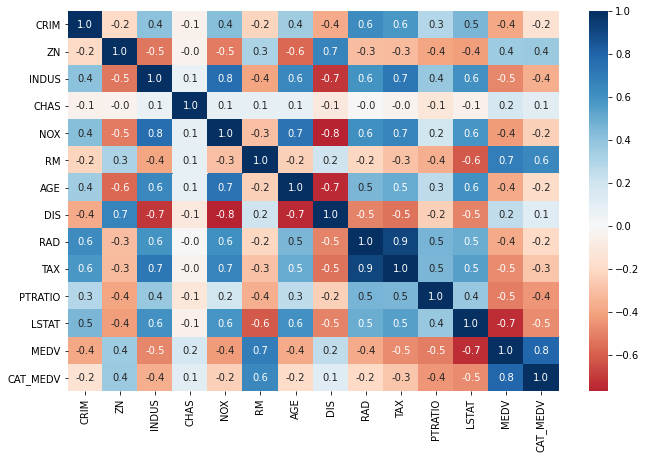

In [0]:
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0)

plt.show()

## Heatmap of Missing Values

In [197]:
# Given a dataframe df, create a copy of the array that is 0 if a field contains a value and 1 for NaN
naInfo = np.zeros(motor_df.shape)
naInfo[motor_df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=motor_df.columns)
naInfo

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1997,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1998,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1999,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


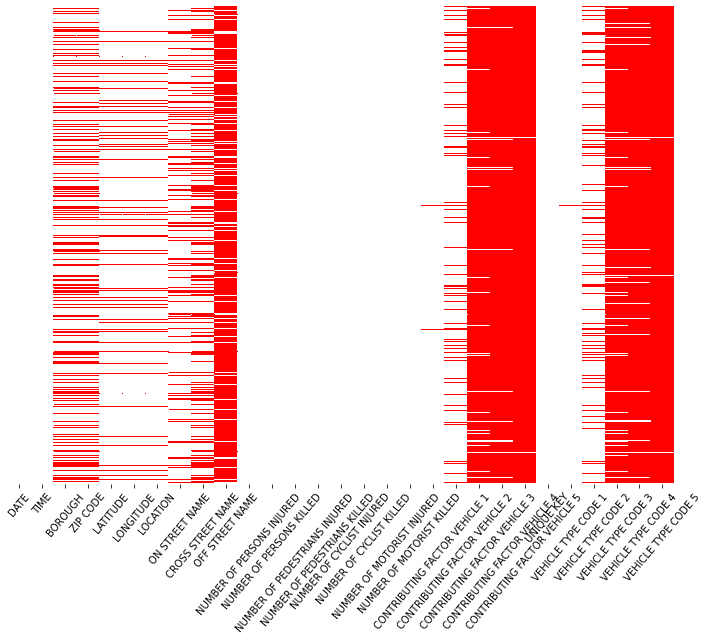

In [198]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "red"], cbar=False)
ax.set_yticks([])
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [199]:
# Create a dataframe with missing values
np.random.seed(1)
df = pd.DataFrame(np.random.randint(50, size=(100, 10)))
df

,0,1,2,3,4,5,6,7,8,9
0,37,43,12,8,9,11,5,15,0,16
1,1,12,7,45,6,25,20,37,18,20
2,11,42,28,29,14,4,23,23,41,49
3,30,32,22,13,41,9,7,22,1,0
4,17,8,24,13,47,42,8,30,7,3
...,...,...,...,...,...,...,...,...,...,...
95,25,19,27,28,8,45,12,46,49,11
96,8,10,23,24,25,18,18,5,47,42
97,46,21,9,42,13,18,23,45,31,33
98,14,47,40,49,8,1,22,2,22,1


In [200]:
df.where(df!=0, np.nan, inplace=True) # Replace values where the condition is False.
df

,0,1,2,3,4,5,6,7,8,9
0,37.0,43.0,12.0,8.0,9.0,11.0,5.0,15.0,NaN,16.0
1,1.0,12.0,7.0,45.0,6.0,25.0,20.0,37.0,18.0,20.0
2,11.0,42.0,28.0,29.0,14.0,4.0,23.0,23.0,41.0,49.0
3,30.0,32.0,22.0,13.0,41.0,9.0,7.0,22.0,1.0,NaN
4,17.0,8.0,24.0,13.0,47.0,42.0,8.0,30.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...
95,25.0,19.0,27.0,28.0,8.0,45.0,12.0,46.0,49.0,11.0
96,8.0,10.0,23.0,24.0,25.0,18.0,18.0,5.0,47.0,42.0
97,46.0,21.0,9.0,42.0,13.0,18.0,23.0,45.0,31.0,33.0
98,14.0,47.0,40.0,49.0,8.0,1.0,22.0,2.0,22.0,1.0


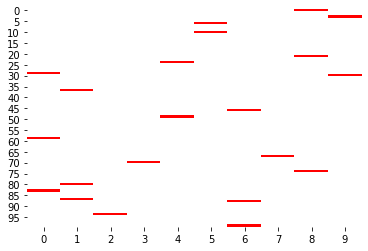

In [203]:
# Given a dataframe df create a copy of the array that is 0 if a field contains a value and 1 for NaN
naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "red"], cbar=False)
#ax.set_yticks([])
plt.show()

# Multidimensional Visualization

## Color-Coding

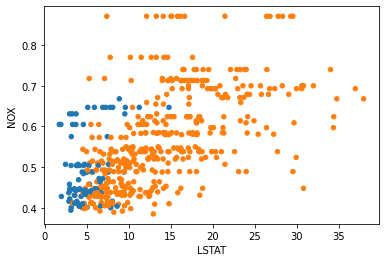

In [204]:
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX', c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])

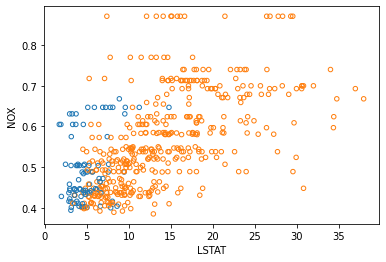

In [205]:
# Change the rendering of the points to open circles by controlling the color
housing_df.plot.scatter(x='LSTAT', y='NOX', color='none',
                        edgecolor=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])

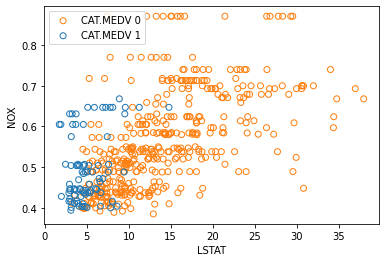

In [208]:
# Plot first the data points for CAT.MEDV of 0 and then of 1
fig, ax = plt.subplots()
for catValue, color in (0, 'C1'), (1, 'C0'):
    subset_df = housing_df[housing_df.CAT_MEDV == catValue]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color)

ax.set_xlabel('LSTAT');ax.set_ylabel('NOX')
ax.legend(["CAT.MEDV 0", "CAT.MEDV 1"])

plt.show()

## Multiple Panels

In [210]:
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
dataForPlot_df

CHAS  RAD
0     1      23.015789
      2      26.833333
      3      27.927778
      4      21.040196
      5      25.521154
      6      20.976923
      7      27.105882
      8      31.505263
      24     15.438710
1     1      50.000000
      3      27.950000
      4      25.812500
      5      27.463636
      8      26.000000
      24     31.362500
Name: MEDV, dtype: float64

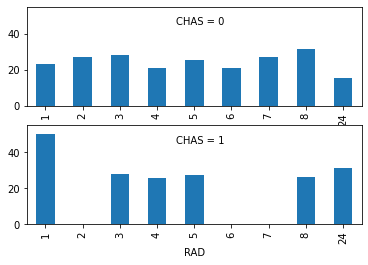

In [211]:
# We determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0

# reorder to rows, so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1] 

fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))

plt.show()

In [0]:
_ = scatter_matrix(housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']], figsize=(6, 6), diagonal='kde')

## Animation

In [212]:
px.scatter(px.data.gapminder(), x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="country", hover_name="country", log_x = True,
           size_max=45, range_x=[100,100000], range_y=[25,90])

# Manipulations

## Rescaling

In [0]:
# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()

plt.show()

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')

# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')
ax.set_yscale('log')

# suppress the title
axes[0].get_figure().suptitle('')
plt.tight_layout()

plt.show()

## Aggregation

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

amtrak_df['Month'] = pd.to_datetime(amtrak_df.Month, format='%d/%m/%Y')
amtrak_df.set_index('Month', inplace=True)

# fit quadratic curve and display 
quadraticFit = np.poly1d(np.polyfit(range(len(amtrak_df)), amtrak_df.Ridership, 2))
amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in range(len(amtrak_df))]})
amtrak_fit.index = amtrak_df.index

ax = amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Zoom in 2-year period 1/1/1991 to 12/1/1992
ridership_2yrs = amtrak_df.loc['1991-01-01':'1992-12-01']
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Average by month
byMonth = amtrak_df.groupby(by=[amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label
yticks = [-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)]);

# Average by year (exclude data from 2004)
byYear = amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()
ax = byYear.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()

plt.show()

# Reference

In [0]:
ax = utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', figsize=(6, 6))
points = utilities_df[['Sales','Fuel_Cost','Company']]
_ = points.apply(lambda x: 
             ax.text(*x, rotation=20, horizontalalignment='left',
                     verticalalignment='bottom', fontsize=8), axis=1)

plt.show()

# Parallel Coordinates Plot

In [0]:
# Transform the axes, so that they all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
dataToPlot = pd.DataFrame(min_max_scaler.fit_transform(housing_df),
                         columns=housing_df.columns)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[8, 6])
for i in (0, 1):
    parallel_coordinates(dataToPlot.loc[dataToPlot.CAT_MEDV == i], 
                         'CAT_MEDV', ax=axes[i], linewidth=0.5)
    axes[i].set_title('CAT.MEDV = {}'.format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)

plt.tight_layout()  # Increase the separation between the plots

plt.show()

---
Phuong Nguyen @ <a href="https://DataScience.vn" target="_blank">DataScience.vn</a>

